In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "D:\\FAST.Ai\\Practical Deep Learning For Coders 1 - YouTube\\Data\\My Dog Breed Identification\\"
sz = 224
arch = resnext101_64
bs = 58

In [4]:
os.listdir(PATH)

['labels.csv', 'sample_submission.csv', 'test', 'tmp', 'train']

In [5]:
label_csv = f'{PATH}labels.csv'

In [11]:
n = len(list(open(label_csv))) - 1

In [7]:
n

10222

In [8]:
val_idxs = get_cv_idxs(n)

In [9]:
val_idxs

array([2882, 4514, 7717, ..., 8922, 6774,   37])

In [13]:
label_df = pd.read_csv(label_csv)

In [14]:
label_df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [15]:
label_df.pivot_table(index  = "breed" , aggfunc=len).sort_values('id', ascending = False)

id
breed                              
scottish_deerhound              126
maltese_dog                     117
afghan_hound                    116
entlebucher                     115
bernese_mountain_dog            114
shih-tzu                        112
great_pyrenees                  111
pomeranian                      111
basenji                         110
samoyed                         109
airedale                        107
tibetan_terrier                 107
leonberg                        106
cairn                           106
beagle                          105
japanese_spaniel                105
australian_terrier              102
blenheim_spaniel                102
miniature_pinscher              102
irish_wolfhound                 101
lakeland_terrier                 99
saluki                           99
papillon                         96
whippet                          95
siberian_husky                   95
norwegian_elkhound               95
pug                              94
chow                             93
italian_greyhound                92
pembroke                         92
...                             ...
german_short-haired_pointer      75
boxer                            75
bull_mastiff                     75
borzoi                           75
pekinese                         75
cocker_spaniel                   74
american_staffordshire_terrier   74
doberman                         74
brittany_spaniel                 73
malinois                         73
standard_schnauzer               72
flat-coated_retriever            72
redbone                          72
border_collie                    72
curly-coated_retriever           72
kuvasz                           71
chihuahua                        71
soft-coated_wheaten_terrier      71
french_bulldog                   70
vizsla                           70
tibetan_mastiff                  69
german_shepherd                  69
giant_schnauzer                  69
walker_hound                     69
otterhound                       69
golden_retriever                 67
brabancon_griffon                67
komondor                         67
briard                           66
eskimo_dog                       66

[120 rows x 1 columns]

In [16]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test', 
                                    val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)

In [17]:
fn = PATH + data.trn_ds.fnames[1]

In [18]:
fn

'D:\\FAST.Ai\\Practical Deep Learning For Coders 1 - YouTube\\Data\\My Dog Breed Identification\\train\\001cdf01b096e06d78e9e5112d419397.jpg'

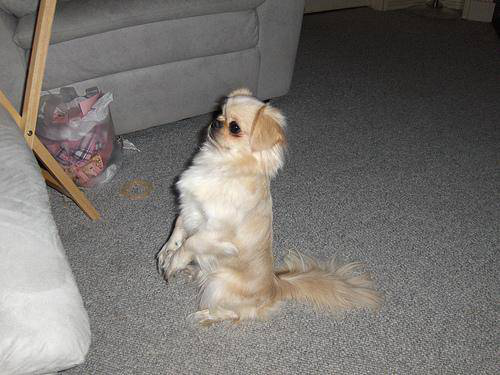

In [19]:
img = PIL.Image.open(fn); img  # for rander a .jpg

In [75]:
img.size

(500, 375)

In [76]:
size_d = {k: PIL.Image.open(PATH + k).size for k in data.trn_ds.fnames}
# when we just load a fraction of data it may leads to error

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\FAST.Ai\\Practical Deep Learning For Coders 1 - YouTube\\Data\\My Dog Breed Identification\\train\\001513dfcb2ffafc82cccf4d8bbaba97.jpg'

In [81]:
type(size_d)

dict

In [82]:
list(zip(*size_d.values()))

[(500,
  500,
  500,
  500,
  500,
  231,
  500,
  402,
  250,
  200,
  374,
  333,
  500,
  390,
  400,
  200,
  500,
  375,
  500,
  300,
  450,
  500,
  594,
  375,
  400,
  500,
  350,
  401,
  500,
  500,
  500,
  500,
  500,
  500,
  288,
  500,
  350,
  500,
  300,
  360,
  337,
  200,
  500,
  500,
  405,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  334,
  500,
  500,
  450,
  360,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  363,
  500,
  333,
  500,
  500,
  591,
  500,
  500,
  196,
  320,
  650,
  400,
  375,
  500,
  500,
  223,
  500,
  349,
  296,
  500,
  500,
  604,
  500,
  500,
  500,
  230,
  800,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  500,
  375,
  355,
  500,
  357,
  500,
  333,
  184,
  384,
  500,
  200,
  322,
  500,
  350,
  333,
  500,
  500,
  500,
  375,
  350,
  325,
  375,
  375,
  150,
  500,
  500,
  357,
  200,
  413,
  616,
  500,
  450,
  244,
  500,

In [83]:
row_sz, col_sz = list(zip(*size_d.values()))

In [84]:
size_d.values()

dict_values([(500, 375), (500, 375), (500, 500), (500, 375), (500, 470), (231, 227), (500, 332), (402, 343), (250, 223), (200, 192), (374, 212), (333, 500), (500, 375), (390, 320), (400, 346), (200, 280), (500, 375), (375, 500), (500, 333), (300, 257), (450, 338), (500, 375), (594, 407), (375, 500), (400, 293), (500, 375), (350, 257), (401, 500), (500, 333), (500, 375), (500, 500), (500, 375), (500, 333), (500, 375), (288, 288), (500, 375), (350, 332), (500, 375), (300, 208), (360, 315), (337, 500), (200, 280), (500, 500), (500, 358), (405, 500), (500, 375), (500, 333), (500, 329), (500, 375), (500, 375), (500, 333), (500, 375), (500, 333), (500, 375), (334, 500), (500, 375), (500, 500), (450, 443), (360, 337), (500, 294), (500, 350), (500, 375), (500, 375), (500, 334), (500, 390), (500, 375), (500, 375), (500, 375), (500, 375), (500, 360), (500, 375), (500, 378), (500, 500), (363, 500), (500, 375), (333, 500), (500, 333), (500, 375), (591, 394), (500, 338), (500, 389), (196, 336), (32

In [85]:
type(row_sz)

tuple

In [86]:
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

(array([3023., 5024.,   92.,   15.,    5.,    3.,   13.,    2.,    0.,    1.]),
 array([  97. ,  413.7,  730.4, 1047.1, 1363.8, 1680.5, 1997.2, 2313.9, 2630.6, 2947.3, 3264. ]),
 <a list of 10 Patch objects>)

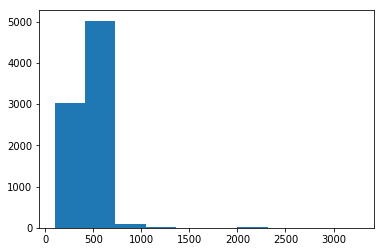

In [87]:
plt.hist(row_sz)

In [88]:
plt.hist(row_sz[ row_sz<1000 ])

(array([ 135.,  592., 1347., 1164., 4599.,  128.,   76.,   62.,   14.,   11.]),
 array([ 97. , 185.5, 274. , 362.5, 451. , 539.5, 628. , 716.5, 805. , 893.5, 982. ]),
 <a list of 10 Patch objects>)

In [89]:
def get_data(sz,bs):
    tfms = tfms_from_model(arch,sz,aug_tfms = transforms_side_on,max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test',
                                       val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    return data if sz > 300 else data.resize(340, 'tmp')

In [91]:
data = get_data(sz,bs)

Some images failed to process:                                                                                         
{
  "train\\e2bbe6eedea8520efe8c709d091be39a.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\e2bbe6eedea8520efe8c709d091be39a.jpg'",
  "train\\76f34fedeebaa49f5ce0faf1b7465798.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\76f34fedeebaa49f5ce0faf1b7465798.jpg'",
  "train\\67f90e266894d87d8a387f0e31cd4e20.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\67f90e266894d87d8a387f0e31cd4e20.jpg'",
  "train\\c4649d3948446cf3cd90da2ee922b3c1.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTu

}
Some images failed to process:                                                                                         
{
  "train\\ff0d0773ee3eeb6eb90a172d6afd1ea1.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\ff0d0773ee3eeb6eb90a172d6afd1ea1.jpg'",
  "train\\12590e7d21b4e221217c7fc8fa67a800.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\12590e7d21b4e221217c7fc8fa67a800.jpg'",
  "train\\547231618deb73591ff006835eb13765.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\547231618deb73591ff006835eb13765.jpg'",
  "train\\644b20efdc7375c268aa32c7b79d0b41.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - You

}
Some images failed to process:                                                                                         
{
  "train\\67f90e266894d87d8a387f0e31cd4e20.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\67f90e266894d87d8a387f0e31cd4e20.jpg'",
  "train\\c4649d3948446cf3cd90da2ee922b3c1.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\c4649d3948446cf3cd90da2ee922b3c1.jpg'",
  "train\\4388ad893780491704aa638a99a8e979.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\4388ad893780491704aa638a99a8e979.jpg'",
  "train\\5391615209a4626d38ebdc23b1456ad1.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - You

}
Some images failed to process:                                                                                         
{
  "train\\ff0d0773ee3eeb6eb90a172d6afd1ea1.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\ff0d0773ee3eeb6eb90a172d6afd1ea1.jpg'",
  "train\\12590e7d21b4e221217c7fc8fa67a800.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\12590e7d21b4e221217c7fc8fa67a800.jpg'",
  "train\\547231618deb73591ff006835eb13765.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\547231618deb73591ff006835eb13765.jpg'",
  "train\\644b20efdc7375c268aa32c7b79d0b41.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - You

}
                                                                                                                       


In [93]:
learn = ConvLearner.pretrained(arch , data , precompute = True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Administrator\\fastai\\courses\\ml1\\fastai/weights/resnext_101_64x4d.pth'

In [98]:
learn.fit(1e-2, 5)

NameError: name 'learn' is not defined

In [99]:
from sklearn import metrics

In [100]:
data = get_data(sz, bs)

Some images failed to process:                                                                                         
{
  "train\\67f90e266894d87d8a387f0e31cd4e20.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\67f90e266894d87d8a387f0e31cd4e20.jpg'",
  "train\\c4649d3948446cf3cd90da2ee922b3c1.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\c4649d3948446cf3cd90da2ee922b3c1.jpg'",
  "train\\4388ad893780491704aa638a99a8e979.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\4388ad893780491704aa638a99a8e979.jpg'",
  "train\\5391615209a4626d38ebdc23b1456ad1.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTu

}
Some images failed to process:                                                                                         
{
  "train\\ff0d0773ee3eeb6eb90a172d6afd1ea1.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\ff0d0773ee3eeb6eb90a172d6afd1ea1.jpg'",
  "train\\12590e7d21b4e221217c7fc8fa67a800.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\12590e7d21b4e221217c7fc8fa67a800.jpg'",
  "train\\547231618deb73591ff006835eb13765.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\547231618deb73591ff006835eb13765.jpg'",
  "train\\b9cdf1e7b56c671e985c6910ee5a4ce0.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - You

}
Some images failed to process:                                                                                         


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Some images failed to process:                                                                                         
{
  "train\\ff0d0773ee3eeb6eb90a172d6afd1ea1.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\ff0d0773ee3eeb6eb90a172d6afd1ea1.jpg'",
  "train\\12590e7d21b4e221217c7fc8fa67a800.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\12590e7d21b4e221217c7fc8fa67a800.jpg'",
  "train\\547231618deb73591ff006835eb13765.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouTube\\\\Data\\\\My Dog Breed Identification\\\\train\\\\547231618deb73591ff006835eb13765.jpg'",
  "train\\644b20efdc7375c268aa32c7b79d0b41.jpg": "[Errno 2] No such file or directory: 'D:\\\\FAST.Ai\\\\Practical Deep Learning For Coders 1 - YouT

}



In [ ]:
learn = Convlearner.pretrained(arch , data , precompute = True , ps =0.5)

In [ ]:
learn.fit(1e-2, 2)

In [ ]:
learn.precompute = False

In [ ]:
learn.fit(1e-2, 5, cycle_len=1)

In [ ]:
#increasing the size (this technique work for modern fully covolutional nets , not for VGG)
learn.set_data(get_data(299, bs))
learn.freeze()

In [ ]:
learn.fit(1e-2, 3, cycle_len=1)

In [ ]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

In [101]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

NameError: name 'learn' is not defined

In [ ]:
log_preds , y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs,y) , matrix.log_loss(y,probs)

In [1]:
df = pd.DataFrame(probs)
df.columns = Data.classes

NameError: name 'pd' is not defined

In [ ]:
df.insert(0,'Id',[o[5:-4] for o in data.test_ds.fnames])

In [ ]:
SUBM = f'{PATH}sub/'
os.makedirs(SUBM,exist_ok = True)
df.to_csv(f'{SUBM}/subm.gz',compression = "gzip", index=False)

In [3]:
#pridict one Image

In [ ]:
fn = data.val_ds.fnames[1]

In [ ]:
trn_tfms , val_tfms = tfms_from_model(arch,size)
im = val_tfms(open_image(PATH+fn)) #open_image() returns numpy.ndarray
preds = laern.predict_array(im[None])
data.classes[np.arg_max(pereds)]

In [4]:
import numpy as np 

In [11]:
x = np.array([[1,2],[3,4]])

In [12]:
x.shape 

(2, 2)

In [14]:
x=x[None]

In [15]:
x.shape 

(1, 2, 2)